## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


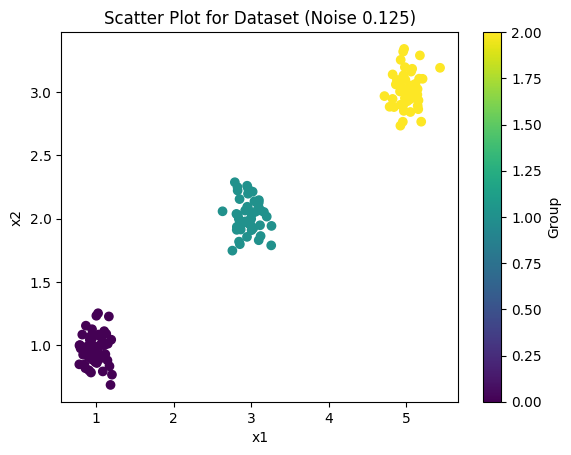

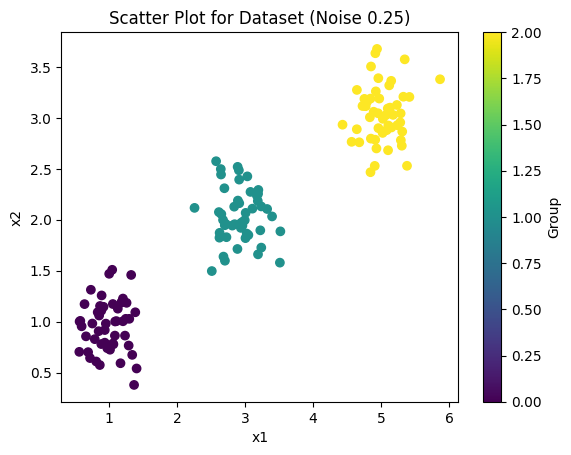

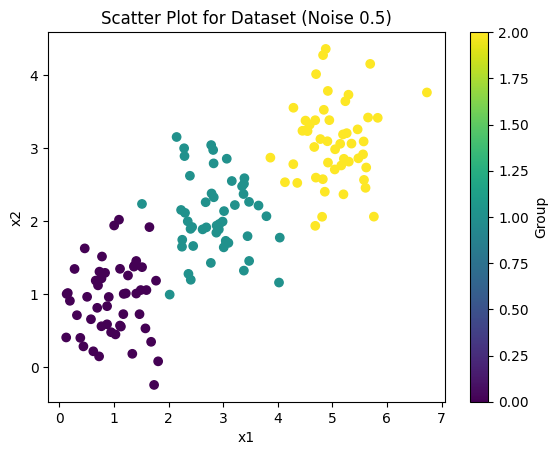

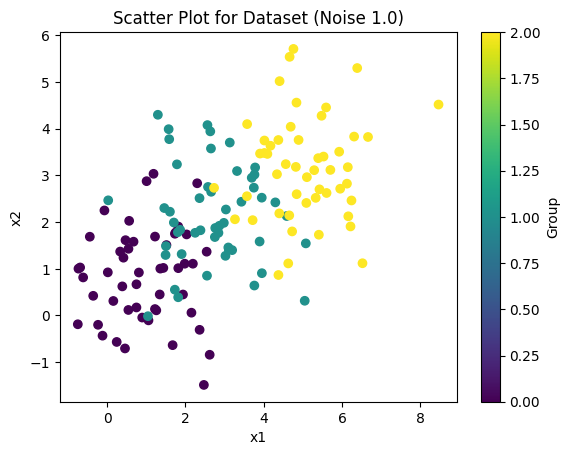

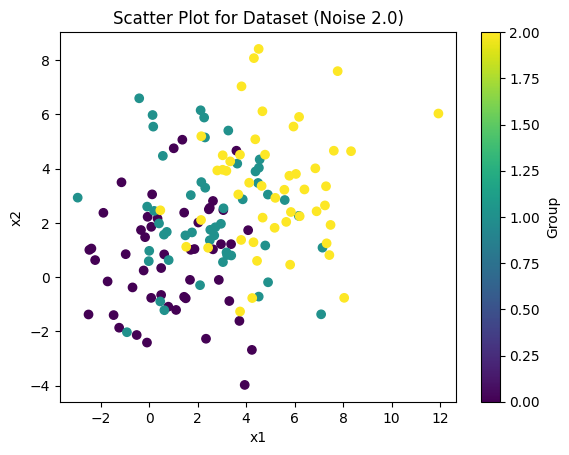

In [6]:
plt.scatter(df0_125['x1'], df0_125['x2'], c = pd.Categorical(df0_125['group']).codes)
plt.title('Scatter Plot for Dataset (Noise 0.125)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Group')
plt.show()

plt.scatter(df0_25['x1'], df0_25['x2'], c = pd.Categorical(df0_25['group']).codes)
plt.title('Scatter Plot for Dataset (Noise 0.25)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Group')
plt.show()

plt.scatter(df0_5['x1'], df0_5['x2'], c = pd.Categorical(df0_5['group']).codes)
plt.title('Scatter Plot for Dataset (Noise 0.5)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Group')
plt.show()

plt.scatter(df1_0['x1'], df1_0['x2'], c = pd.Categorical(df1_0['group']).codes)
plt.title('Scatter Plot for Dataset (Noise 1.0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Group')
plt.show()

plt.scatter(df2_0['x1'], df2_0['x2'], c = pd.Categorical(df2_0['group']).codes)
plt.title('Scatter Plot for Dataset (Noise 2.0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Group')
plt.show()

# As the value of noise increases the clusters become less and less distinct


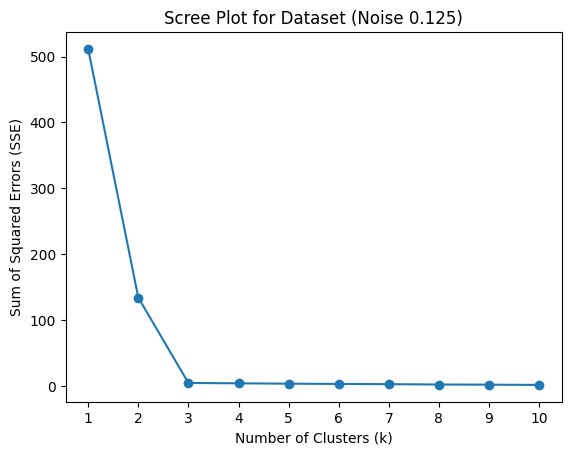

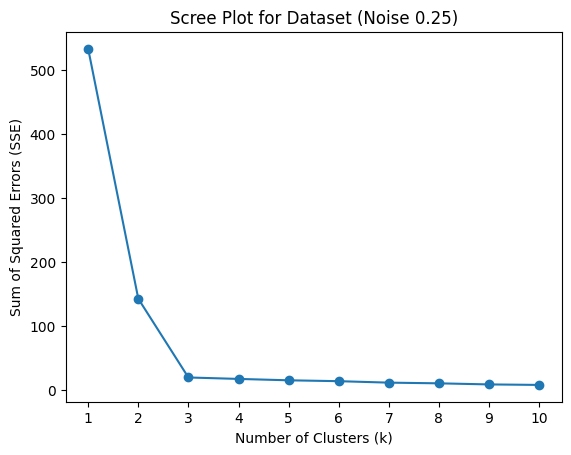

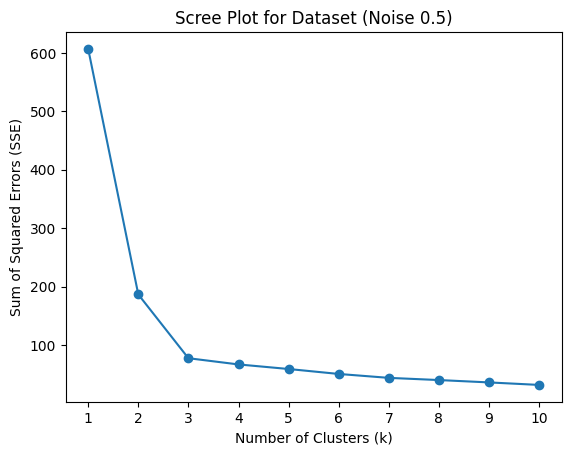

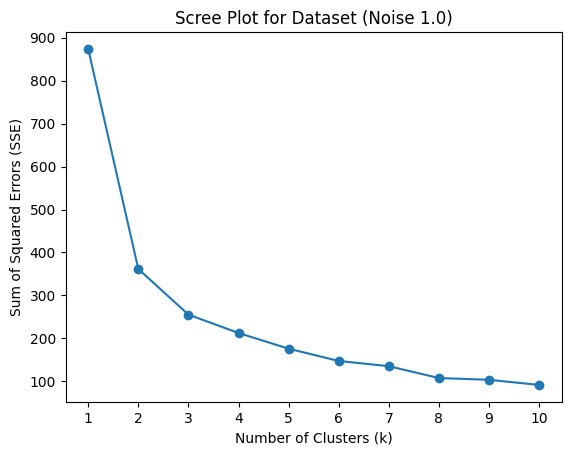

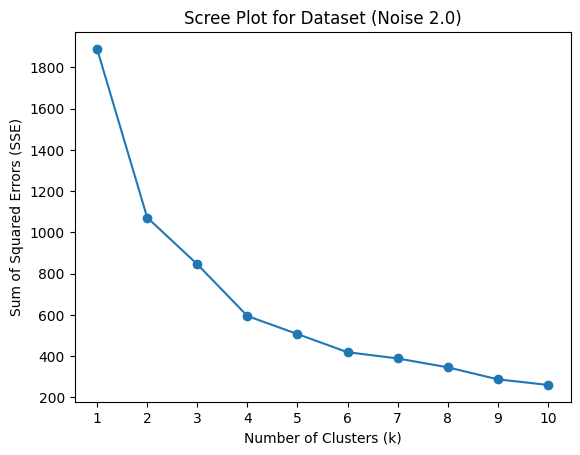

In [12]:
sse1 = []

X = df0_125[['x1', 'x2']].values

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse1.append(kmeans.inertia_)

plt.plot(range(1, 11), sse1, marker = 'o')
plt.title('Scree Plot for Dataset (Noise 0.125)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

sse2 = []

X = df0_25[['x1', 'x2']].values

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse2.append(kmeans.inertia_)

plt.plot(range(1, 11), sse2, marker = 'o')
plt.title('Scree Plot for Dataset (Noise 0.25)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

sse3 = []

X = df0_5[['x1', 'x2']].values

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse3.append(kmeans.inertia_)

plt.plot(range(1, 11), sse3, marker = 'o')
plt.title('Scree Plot for Dataset (Noise 0.5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

sse4 = []

X = df1_0[['x1', 'x2']].values

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse4.append(kmeans.inertia_)

plt.plot(range(1, 11), sse4, marker = 'o')
plt.title('Scree Plot for Dataset (Noise 1.0)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

sse5 = []

X = df2_0[['x1', 'x2']].values

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse5.append(kmeans.inertia_)

plt.plot(range(1, 11), sse5, marker = 'o')
plt.title('Scree Plot for Dataset (Noise 2.0)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

# As the value of noise increases, the value of SSE increases drastically and
# the drop-off in the graph becomes less and less severe

# Based on these graphs we could conclude that k = 3 seems optimal since with
# a noise value of 0.125 there is a very distinct elbow drop-off that occurs
# at a value of 3
# Additionally, as noise increases this elbow becomes less distinct and makes
# it more difficult to determine the best k-value


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

In [17]:
df = pd.read_csv('SIPRI Military Expenditure Database.csv')
df = df[df['Year'] == 2020]
df = df.dropna()

df.describe()
# Needed to make sure there were only 148 values of each variable


,index,Year,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
count,148.000000,148.0,148.000000,148.000000,148.000000,148.000000
mean,2831.256757,2020.0,13153.747670,0.019619,0.061510,268.264494
std,1654.299355,0.0,68005.236120,0.015033,0.046207,430.434878
min,32.000000,2020.0,8.622460,0.000054,0.004896,0.580129
25%,1409.000000,2020.0,204.877177,0.010413,0.031352,20.553464
50%,2871.000000,2020.0,959.535443,0.015324,0.047402,81.506703
75%,4222.500000,2020.0,5289.998320,0.024327,0.084681,326.267753
max,5880.000000,2020.0,778397.200000,0.098470,0.303027,2520.398541


In [19]:
df.head()

# Based on the preliminary description and first 5 instances in the dataset
# it does not seem like there needs to be additional cleaning, but I will
# probably encounter an error down the line that needs fixing


,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731


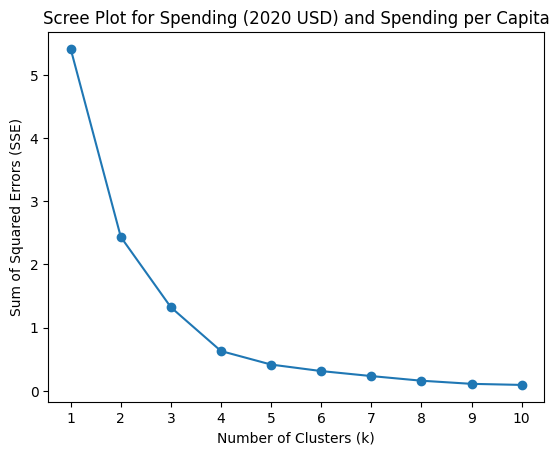

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Spending (2020 USD)', 'Spending per Capita']] = scaler.fit_transform(df[['Spending (2020 USD)', 'Spending per Capita']])

X = df[['Spending (2020 USD)', 'Spending per Capita']].values

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Scree Plot for Spending (2020 USD) and Spending per Capita')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

# Based on the scree plot elbow it seems that the optimal k-value is 4


In [29]:
optimal_k = 4
kmeans = KMeans(n_clusters = optimal_k, random_state = 100)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_


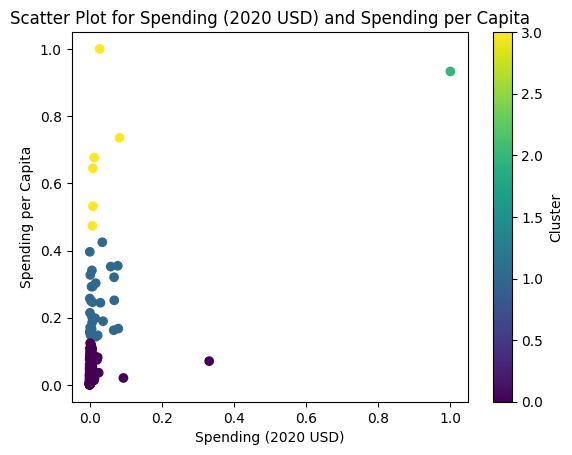

In [30]:
plt.scatter(df['Spending (2020 USD)'], df['Spending per Capita'], c = pd.Categorical(df['cluster']).codes)
plt.title('Scatter Plot for Spending (2020 USD) and Spending per Capita')
plt.xlabel('Spending (2020 USD)')
plt.ylabel('Spending per Capita')
plt.colorbar(label = 'Cluster')
plt.show()

# The scatter plot is interesting because it shows that all but one country
# within the clusters seems to increase spending per capital as cluster increases
# except for the k = 2 country that spent almost 100x more than everyone else


In [31]:
cluster_summary = df.groupby('cluster').describe()
print(cluster_summary)


         index                                                            \
         count         mean          std     min     25%     50%     75%   
cluster                                                                    
0        111.0  2768.540541  1665.488123    32.0  1205.0  2752.0  4112.0   
1         30.0  2782.600000  1664.320688   236.0  1494.0  2769.0  4307.5   
2          1.0  5540.000000          NaN  5540.0  5540.0  5540.0  5540.0   
3          6.0  3783.333333   843.766476  2582.0  3194.0  4027.0  4375.5   

                  Year          ... Spending per Capita           Cluster  \
            max  count    mean  ...                 75%       max   count   
cluster                         ...                                         
0        5880.0  111.0  2020.0  ...            0.049530  0.124462   111.0   
1        5506.0   30.0  2020.0  ...            0.300319  0.424651    30.0   
2        5540.0    1.0  2020.0  ...            0.933024  0.933024     1.0   
3    

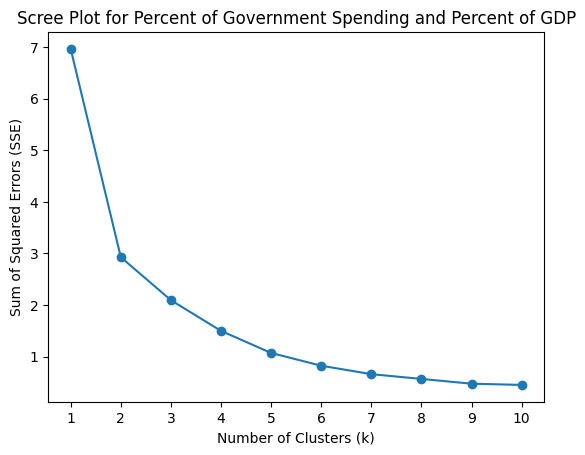

In [33]:
scaler = MinMaxScaler()
df[['Percent of Government Spending', 'Percent of GDP']] = scaler.fit_transform(df[['Percent of Government Spending', 'Percent of GDP']])

X = df[['Percent of Government Spending', 'Percent of GDP']].values

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Scree Plot for Percent of Government Spending and Percent of GDP')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

# Elbow of this scree plot seems to be between 3-5, so I will once again say
# the optimal value is k = 4


In [34]:
optimal_k = 4
kmeans = KMeans(n_clusters = optimal_k, random_state = 100)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_


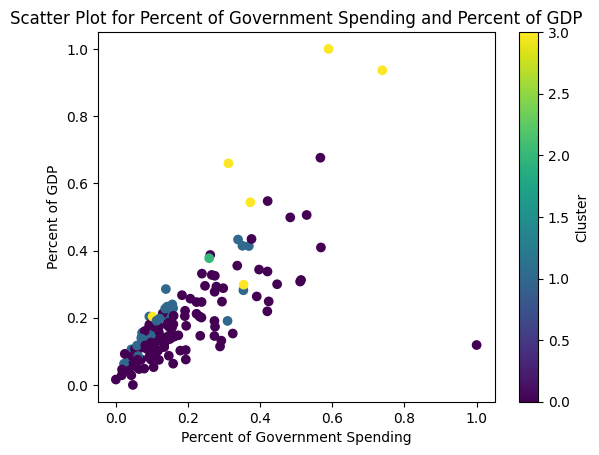

In [35]:
plt.scatter(df['Percent of Government Spending'], df['Percent of GDP'], c = pd.Categorical(df['cluster']).codes)
plt.title('Scatter Plot for Percent of Government Spending and Percent of GDP')
plt.xlabel('Percent of Government Spending')
plt.ylabel('Percent of GDP')
plt.colorbar(label = 'Cluster')
plt.show()

# Compared to the previously generated scatterplot, there seems to be a more lineae
# relationship between these percent variables
# However, there does not seem to be much of a correlation with the percentage
# of spending and GDP vs. which cluster a country is located in


In [36]:
cluster_summary = df.groupby('cluster').describe()
print(cluster_summary)


         index                                                            \
         count         mean          std     min     25%     50%     75%   
cluster                                                                    
0        111.0  2768.540541  1665.488123    32.0  1205.0  2752.0  4112.0   
1         30.0  2782.600000  1664.320688   236.0  1494.0  2769.0  4307.5   
2          1.0  5540.000000          NaN  5540.0  5540.0  5540.0  5540.0   
3          6.0  3783.333333   843.766476  2582.0  3194.0  4027.0  4375.5   

                  Year          ... Spending per Capita           Cluster  \
            max  count    mean  ...                 75%       max   count   
cluster                         ...                                         
0        5880.0  111.0  2020.0  ...            0.049530  0.124462   111.0   
1        5506.0   30.0  2020.0  ...            0.300319  0.424651    30.0   
2        5540.0    1.0  2020.0  ...            0.933024  0.933024     1.0   
3    

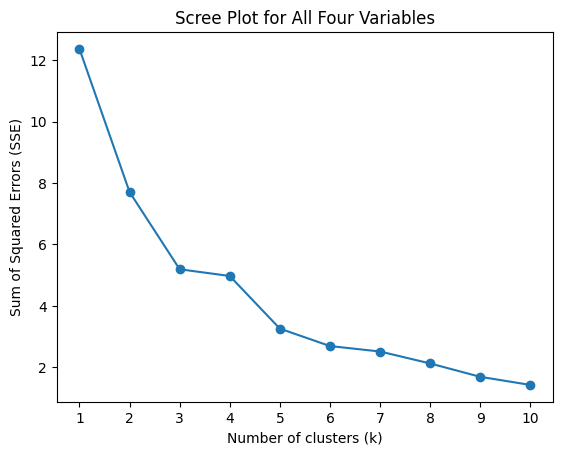

In [39]:
scaler = MinMaxScaler()
df[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']] = scaler.fit_transform(
    df[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']])

X = df[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']].values

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 100)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Scree Plot for All Four Variables')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()

# Based on the scree plot the elbow seems to be at k = 5


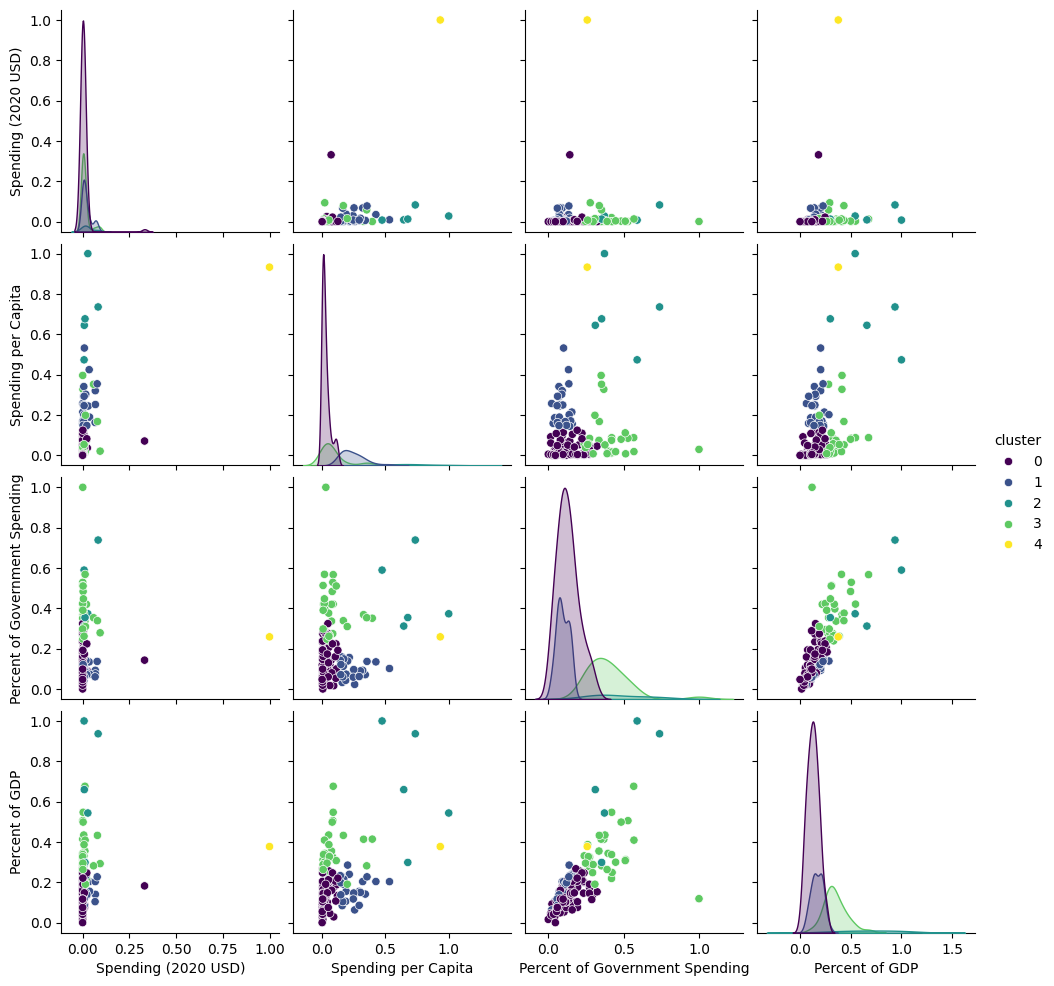

In [40]:
optimal_k = 5
kmeans = KMeans(n_clusters = optimal_k, random_state = 100)
df['cluster'] = kmeans.fit_predict(X)

sns.pairplot(df[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP', 'cluster']], hue = 'cluster', palette = 'viridis')
plt.show()

# I'm pretty proud of these graphs I won't lie
# Allows us to analyze each of the different variables in relation to each other
# and themselves, which are characterized by either scatter or density plots
# that also allow us to look at potential cluster relationships

# One that really stands out to me is Spending (2020) and Percent of GDP, where
# not only does there seem to not be a real relationship between the variables, with
# all values clustered around 25% GDP, but cluster 2 has a higher GDP percentage
# than clusters 0, 1, 3, and even 4 (though it is so high up in the graph it's
# easy to miss)


In [41]:
cluster_summary = df.groupby('cluster').describe()
print(cluster_summary)


        index                                                            \
        count         mean          std     min     25%     50%     75%   
cluster                                                                   
0        86.0  2841.744186  1630.948935    32.0  1536.5  2837.0  4205.5   
1        26.0  2851.384615  1592.766225   236.0  1732.0  2854.0  4214.0   
2         5.0  3738.000000   935.154533  2582.0  2922.0  4044.0  4486.0   
3        30.0  2542.333333  1812.819719   100.0   763.0  2616.0  3729.5   
4         1.0  5540.000000          NaN  5540.0  5540.0  5540.0  5540.0   

                 Year          ... Spending per Capita           Cluster  \
            max count    mean  ...                 75%       max   count   
cluster                        ...                                         
0        5880.0  86.0  2020.0  ...            0.037862  0.124462    86.0   
1        5506.0  26.0  2020.0  ...            0.292696  0.531974    26.0   
2        4656.0   5

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?